In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])

In [3]:
df.loc[:10,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [6]:
salary_year_median=df['salary_year_avg'].median()

In [7]:
salary_hour_median=df['salary_hour_avg'].median()

In [8]:
df_filled=df

In [9]:
df_filled['salary_year_avg']=df_filled['salary_year_avg'].fillna(salary_year_median)
df_filled['salary_hour_avg']=df_filled['salary_hour_avg'].fillna(salary_hour_median)

In [10]:
df_filled.loc[:10,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [11]:
df_unique=df_filled

In [13]:
df_unique=df_unique.drop_duplicates()

In [14]:
len(df_unique)

785640

In [15]:
df_unique = df_unique.drop_duplicates(subset=['job_title','company_name'])
print("original df",len(df_filled))
print("len of drop duplicates df",len(df_unique))
print('Rows dropped',len(df_filled)-len(df_unique))

original df 785741
len of drop duplicates df 508042
Rows dropped 277699


In [21]:
df.sample(5,random_state=10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
189968,Data Engineer,Data Engineer,"London, UK",via WREG Jobs,Full-time,False,United Kingdom,2023-08-18 15:17:58,True,False,United Kingdom,NaN,115000.0,45.98,SC4 Recruitment Limited,['airflow'],{'libraries': ['airflow']}
559367,Data Engineer,(Mid) Data Engineer,Spain,via BeBee,Full-time,False,Spain,2023-09-28 04:33:10,True,False,Spain,NaN,115000.0,45.98,PIA Media,"['sql', 'python', 'bigquery', 'airflow', 'linu...","{'cloud': ['bigquery'], 'libraries': ['airflow..."
233787,Senior Data Analyst,Senior Data Analyst,Chile,via BeBee Chile,Full-time,False,Chile,2023-06-16 07:52:25,True,False,Chile,NaN,115000.0,45.98,Business Agility – Portfolios,"['sql', 'r', 'python', 'elasticsearch', 'azure...","{'cloud': ['azure'], 'databases': ['elasticsea..."
776749,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-23 05:57:15,False,False,Nepal,NaN,115000.0,45.98,Reputed IT Company,"['sql', 't-sql', 'c#', 'python', 'vba', 'sql s...","{'analyst_tools': ['ssrs'], 'databases': ['sql..."
466836,Data Analyst,Junior Data Analyst,"Waregem, Belgium",via VDAB,Full-time,False,Belgium,2023-09-11 14:25:16,True,False,Belgium,NaN,115000.0,45.98,HAYS,['power bi'],{'analyst_tools': ['power bi']}


In [22]:
df2=df

In [24]:
id(df)==id(df2)

True

In [25]:
df.pivot_table(index='job_title_short',aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [36]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])

In [37]:
top_countries=df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [38]:
df_job_country_salary=df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [39]:
df_job_country_salary=df_job_country_salary.loc[top_countries]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [40]:
job_titles=["Data Analyst","Data Engineer",'Data Scientist']
df_job_country_salary=df_job_country_salary[job_titles]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


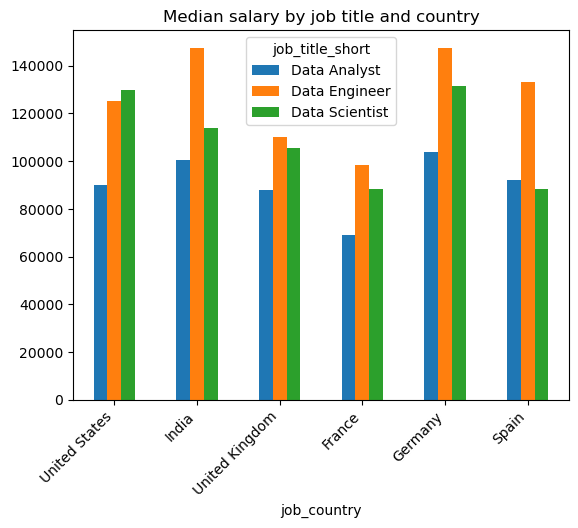

In [42]:
df_job_country_salary.plot(kind="bar")
plt.xlabel=''
plt.ylabel='Median salary($USD)'
plt.title("Median salary by job title and country")
plt.xticks(rotation=45,ha='right')
plt.show()